In [67]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import glob as glob
from scipy.optimize import curve_fit
import os

In [58]:
folder = "Dag 2\\Split Mg data"
names = glob.glob(os.path.join(folder,'*.txt'))
files = []
for i in names[0:]:
    k = np.loadtxt(i)
    
    files.append(k)
#files[0]

In [59]:
# rciproc fit
a = 22.686360626124895
b = 0.004380389246954719
# usikkerheder: [8.26845800e-01 7.70049307e-04]
# chi2: 24.685075717678107  ---> p: 0.9999417974035777
# a/x+b
t = 0.73971712
y = 0.3785

true_counts = []

for i in files:
    energy = i[0][2:]*t + y
    factor = a/energy + b
    real_count = i[1][2:]/factor
    true_counts.append([energy, real_count])

#count = np.array(true_counts)

In [72]:
energies = [848, 2117, 1240, 2662, 1813, 2965, 3122, 2116, 1036, 3377, 2526, 2582]
width = [25, 30, 20, 40, 40, 40, 5, 40, 5, 60, 40, 5]
total_counts = [[], [], [], [], [], [], [], [], [], [], [], []]
for i in true_counts:
    for j in range(len(energies)):
        idx = np.where((i[0] >= (energies[j]-width[j]/2)) & (i[0] <= (energies[j]+width[j]/2)))
        total_counts[j].append( np.sum(i[1][idx]) )
        
total_counts = np.array(total_counts)

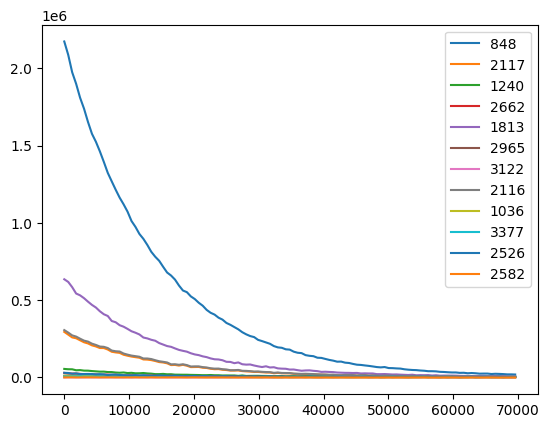

In [73]:
xhelp = np.linspace(0.00145053, 69536.05847064, len(total_counts[0]))
for i in range(len(total_counts)):
    plt.plot(xhelp, total_counts[i], label='{}'.format(energies[i]))
plt.legend()

####################################################################################################
usikkerheder: [9.55093839e-08 4.90469700e+03 1.14188596e+02]
chi2: 400.7252261888541  ---> p: 1.0
[7.33971832e-05 2.16698758e+06 6.27150156e+03]


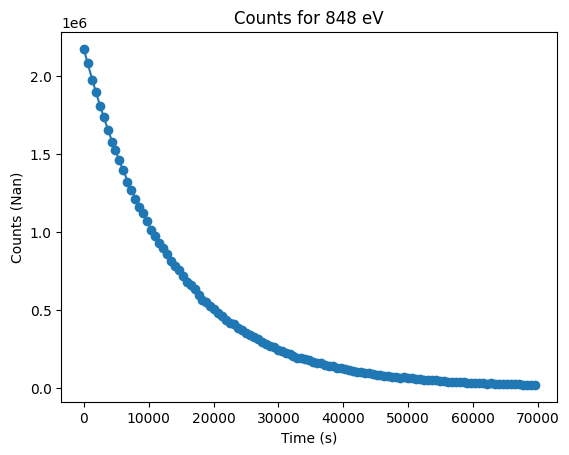

####################################################################################################
usikkerheder: [1.09009756e-07 6.72610539e+02 2.04881256e+01]
chi2: 4691.776741818887  ---> p: 1.0
[7.33239293e-05 2.85106935e+05 2.66776588e+03]


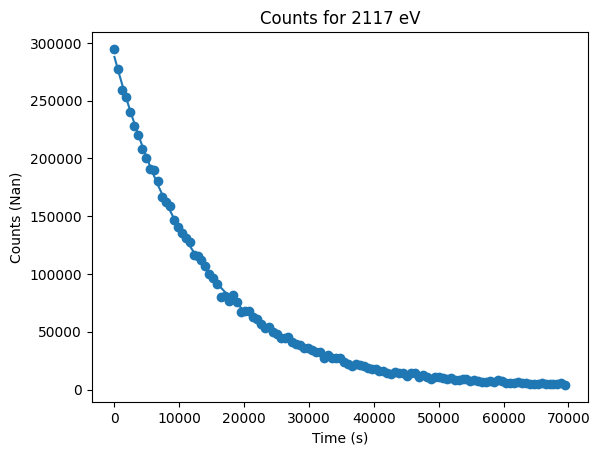

####################################################################################################
usikkerheder: [1.96740898e-07 1.50398853e+02 1.24794759e+01]
chi2: 6153.2809583640665  ---> p: 1.0
[7.29832644e-05 5.18132456e+04 4.24416881e+03]


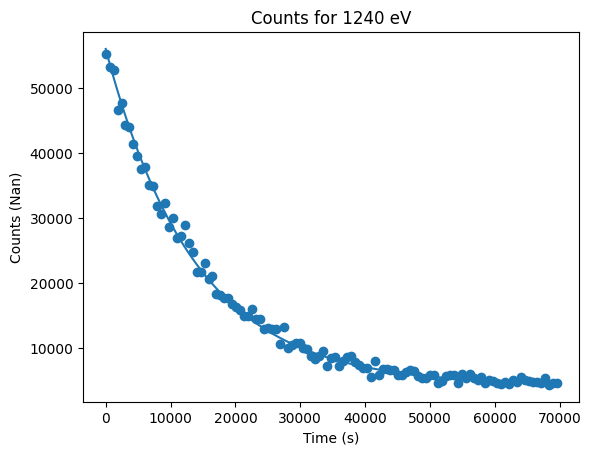

####################################################################################################
usikkerheder: [2.15583403e-07 7.47393893e+01 6.36969995e+00]
chi2: 21216.773081037216  ---> p: 1.0
[7.39904682e-05 2.41636528e+04 2.36012860e+03]


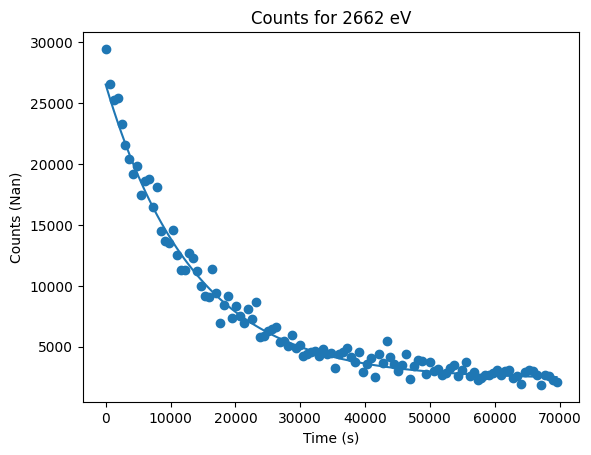

####################################################################################################
usikkerheder: [1.03449007e-07 1.47437826e+03 4.00330388e+01]
chi2: 2414.3966299800595  ---> p: 1.0
[7.34832119e-05 6.35523755e+05 3.96942177e+03]


C:\Users\andre\AppData\Local\Temp\ipykernel_25488\3262007870.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-t*a)*b +c
C:\Users\andre\AppData\Local\Temp\ipykernel_25488\3262007870.py:2: RuntimeWarning: overflow encountered in multiply
  return np.exp(-t*a)*b +c


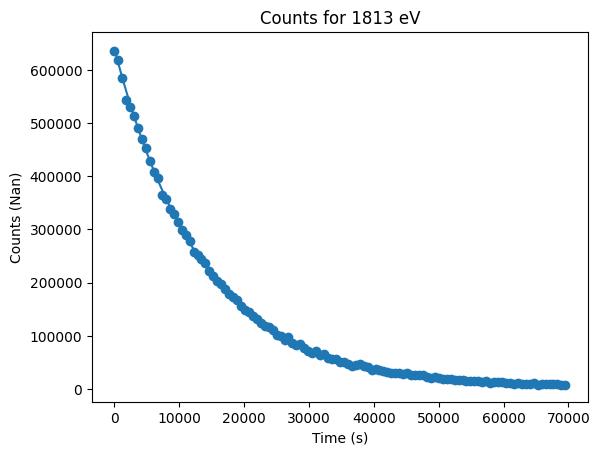

####################################################################################################
usikkerheder: [3.28155050e-07 3.72237737e+01 4.83288278e+00]
chi2: 34036.0340371683  ---> p: 1.0
[7.73035424e-05 1.00764863e+04 2.18266110e+03]


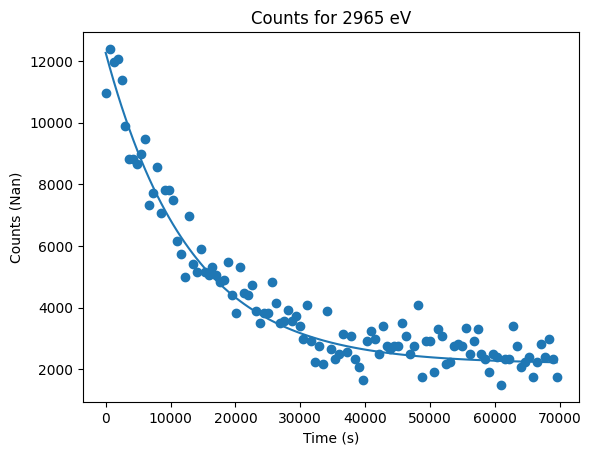

####################################################################################################
usikkerheder: [inf inf inf]
chi2: inf  ---> p: 1.0
[7.e-05 1.e+02 1.e+02]


C:\Users\andre\AppData\Local\Temp\ipykernel_25488\3262007870.py:9: RuntimeWarning: divide by zero encountered in divide
  chmin = np.sum(((counts - funlin(xhelp, *popt))/yler) ** 2)


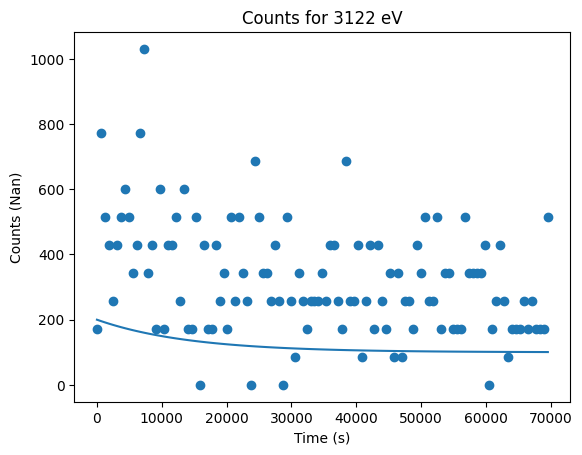

####################################################################################################
usikkerheder: [1.14006243e-07 7.12941530e+02 2.37076192e+01]
chi2: 3846.3202649357513  ---> p: 1.0
[7.33623910e-05 2.98158059e+05 3.64273964e+03]


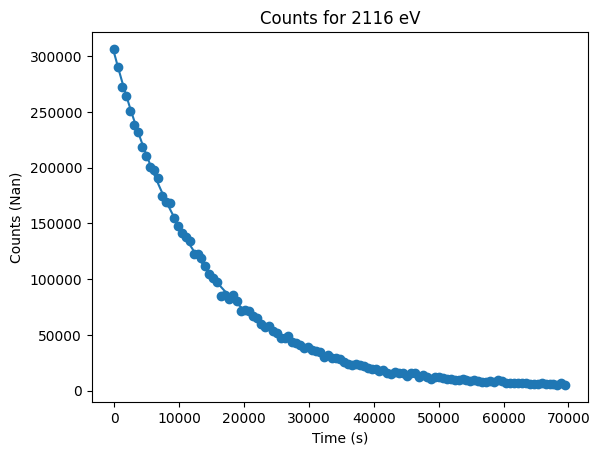

####################################################################################################
usikkerheder: [2.11029501e-07 3.10492286e+01 2.61204350e+00]
chi2: 26047.860118294117  ---> p: 1.0
[7.45243460e-05 1.03693905e+04 9.20399450e+02]


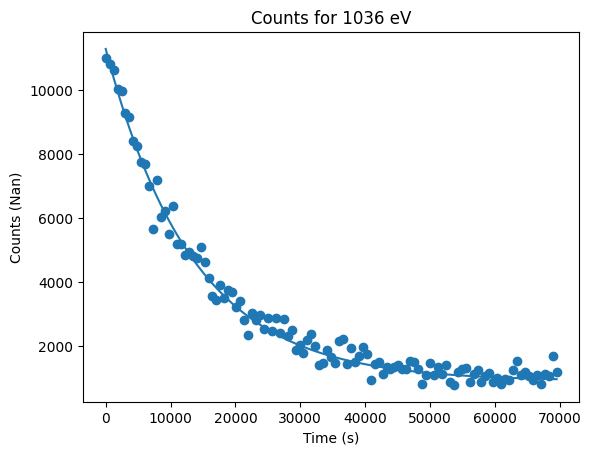

####################################################################################################
usikkerheder: [7.15257800e-07 2.23276699e+01 7.16974784e+00]
chi2: 32159.180109362886  ---> p: 1.0
[6.49560211e-05 3.57705966e+03 3.18435404e+03]


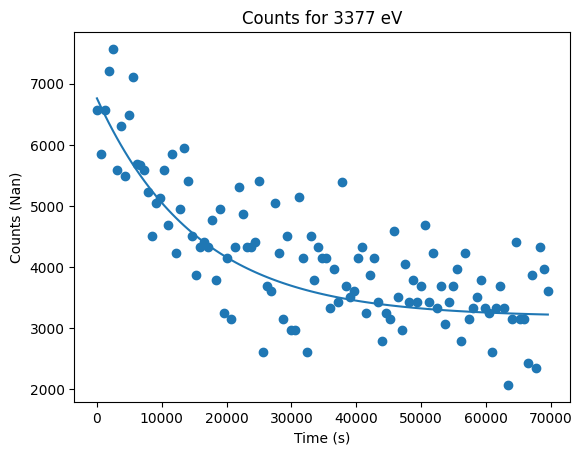

####################################################################################################
usikkerheder: [2.25787571e-07 7.92902304e+01 7.59953417e+00]
chi2: 15636.133006140324  ---> p: 1.0
[7.35049036e-05 2.56283161e+04 2.80293614e+03]


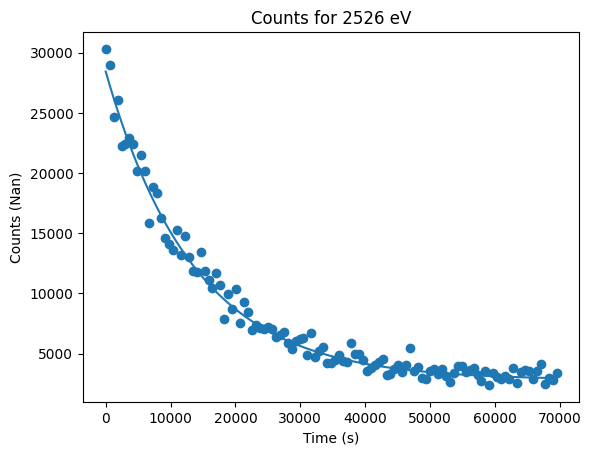

####################################################################################################
usikkerheder: [inf inf inf]
chi2: inf  ---> p: 1.0
[7.e-05 1.e+02 1.e+02]


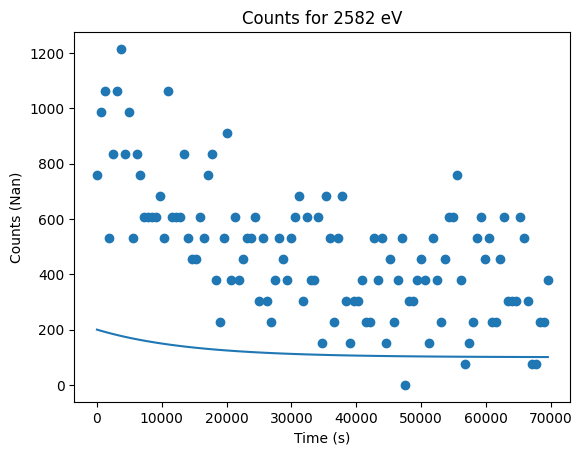

In [74]:
def funlin(t, a, b, c):
    return np.exp(-t*a)*b +c
def fit(counts, a, b, k, name):
    xhelp = np.linspace(0.00145053, 69536.05847064, len(total_counts[0]))
    yler = np.array(counts)*0.01
    popt, pcov = curve_fit(funlin, xhelp, counts, p0=[a, b, k], sigma=yler, absolute_sigma=True)
    perr = np.sqrt(np.diag(pcov))
    print('usikkerheder:', perr)
    chmin = np.sum(((counts - funlin(xhelp, *popt))/yler) ** 2)
    print('chi2:', chmin, ' ---> p:', ss.chi2.cdf(chmin, 3))
    print(popt)
    plt.plot(xhelp, funlin(xhelp, *popt))
    plt.scatter(xhelp, counts)
    plt.xlabel('Time (s)')
    plt.ylabel('Counts (Nan)')
    plt.title('Counts for {} eV'.format(name))
    plt.show()
    return popt[0], popt[1], popt[2]

lambd = []
n0 = []
alis = [0.00007, 0.00007, 0.00007, 0.00007, 0.00007, 0.00007, 0.00007,0.00007,0.00007, 0.00007, 0.00007, 0.00007]
blis = [10000, 7000, 100, 10000, 100, 100, 100 ,100, 100, 100, 100, 100]
clis = [600, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100]
for i in range(len(total_counts)):
    print('#'*100)
    a, b, c = fit(total_counts[i], alis[i], blis[i], clis[i], energies[i])
    if i in [0,1,2,3,4,5,7,9,10]:
        lambd.append(a)
        n0.append(b)

In [76]:
life = np.array(lambd)

print('Lifetimes: ', (1/life)/3600, '\nMean lifttime: ', np.mean((1/life)/3600) )
print('Halflives: ', (np.log(2)/life)/3600,'\nMean halftime: ', np.mean((np.log(2)/life)/3600))

print(np.sum(n0))

Lifetimes:  [3.78458362 3.7883646  3.80604759 3.75423733 3.78015292 3.59333828
 3.78637847 4.27639768 3.77903737] 
Mean lifttime:  3.8165042067484314
Halflives:  [2.62327347 2.62589424 2.63815116 2.60223902 2.62020234 2.4907123
 2.62451756 2.96417299 2.6194291 ] 
Mean halftime:  2.6453991305028457
3501035.0872118813
